In [1]:
# coding: utf-8
from tkinter import filedialog
import os
import re
# ファイル指定
# typ = [('CSVファイル','*.csv')] 
typ = [(' ','*')] 
# dir = 'C:\\'
dir = 'C:\\Users\\17T2166H\\OneDrive\\信州大学\\四年\\研究\\実験'
fle = filedialog.askopenfilename(filetypes = typ, initialdir = dir) 
csv_name = fle
print("読み込みファイル:",fle)
実験number =re.findall(r"\d+", os.path.splitext(os.path.basename(fle))[0])[0]
# csv_name ="YYNo"+実験number+"_4pd.csv"

読み込みファイル: C:/Users/17T2166H/OneDrive/信州大学/四年/研究/実験/20211130_第30回/Xray/YYNo30C1.dat


In [2]:
# import seaborn as sns
import pandas as pd
import numpy as np
# from scipy.signal import argrelmax
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
# 日本語出力対応
plt.rcParams['font.family'] = 'IPAexGothic'

In [3]:
#CSVファイルをUTF-8形式で読み込む
df_score = pd.read_csv(csv_name,encoding = 'UTF8', engine='python', names=("2sita", "cps"), sep="   ")
#dataを出力
df_score[0:10]

,2sita,cps
0,20.00,130
1,20.02,105
2,20.04,116
3,20.06,109
4,20.08,115
5,20.10,108
6,20.12,136
7,20.14,98
8,20.16,131
9,20.18,134


In [4]:
# 移動平均を作成
average_num=5
df_score["cps移動平均"]=df_score["cps"].rolling(average_num).mean().round(1)
# df_score[0:10]

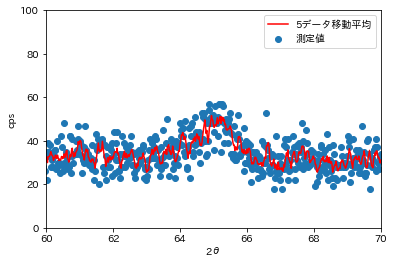

In [5]:
# 表示データ抜き出し
x=df_score["2sita"]
y=df_score["cps"]
y_rolling=df_score["cps移動平均"]

# グラフの作成、表示、保存（PDF）
# fig = plt.figure()
# ax = fig.add_subplot(111) 
plt.scatter(x, y, label="測定値")
plt.plot(x, y_rolling,color="r", label=str(average_num)+"データ移動平均")
# plt.set_title("YYNo"+実験number)
plt.xlabel("2θ")
plt.ylabel("cps")
plt.legend()
# 個別調整
# plt.yscale('log')
plt.yscale('linear')
plt.xlim(60,70)
# plt.xlim(64,68)
# kubomi = 68.7
# plt.xlim(kubomi-0.3,kubomi+0.3)
# plt.xlim(60,70)

plt.ylim(0,100)
# plt.ylim(0,30)
plt.show()

In [6]:
plt.close()

In [7]:
# show_point=69.1
# show_nom=int((show_point-20)/0.02)
# df_score[show_nom-10:show_nom+10]
df_score["2sita"][1]-df_score["2sita"][0]

0.019999999999999574

In [10]:
show_point=65.20
# show_point=kubomi
show_nom=int((show_point-20)/0.02)
df_score[show_nom-10:show_nom+10]
# df_score["2sita"][show_nom-25:show_nom+25].max()

,2sita,cps,cps移動平均
2250,65.0008,36,47.0
2251,65.0208,44,46.2
2252,65.0408,56,47.2
2253,65.0608,49,47.4
2254,65.0808,49,46.8
2255,65.1008,48,49.2
2256,65.1208,51,50.6
2257,65.1408,42,47.8
2258,65.1608,57,49.4
2259,65.1808,49,49.4


In [50]:
np_peak =(df_score["cps"][show_nom-25:show_nom+25].values)
# x = np.array([2, 1, 2, 3, 2, 0, 1, 0])
print(np_peak)
print(argrelmax(np_peak, order=3))

[  2580   2722   2691   2774   2764   2622   2740   2888   3134   3398
   3995   4728   5906   8019  12576  27076  76367 121597  99366  48697
  22271  12676   9262   9133  12482  24700  58852  84724  64602  30466
  14082   7628   4979   3706   2998   2476   2143   1882   1685   1358
   1276   1151   1010   1000    850    846    735    763    619    619]
(array([ 3, 17, 27], dtype=int64),)
